Se carga el dataset que se utilizara

In [19]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('windserie.csv', header=None))
print(dataset.head)

<bound method NDFrame.head of          0
0      6.0
1      7.1
2     10.0
3      6.9
4      8.4
5      8.9
6      6.7
7      7.6
8      3.9
9      4.9
10     3.6
11     3.4
12     2.7
13     2.2
14     3.0
15     2.6
16     3.0
17     2.7
18     4.0
19     3.8
20     3.9
21     5.8
22     7.2
23     6.8
24     5.9
25     6.4
26     6.7
27     7.6
28     6.9
29     4.8
...    ...
4212   3.4
4213   4.2
4214   4.8
4215   2.3
4216   3.0
4217   2.7
4218   3.0
4219   2.6
4220   2.5
4221   3.3
4222   7.7
4223   9.7
4224  12.7
4225  13.2
4226  12.7
4227  15.8
4228  13.6
4229   9.1
4230   5.3
4231   2.8
4232   5.0
4233   4.5
4234   3.3
4235   3.4
4236   3.4
4237   2.8
4238   2.5
4239   2.4
4240   2.9
4241   2.8

[4242 rows x 1 columns]>


Se aplica media movil en los datos.

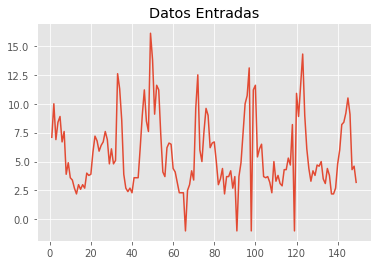

<Figure size 2560x1920 with 0 Axes>

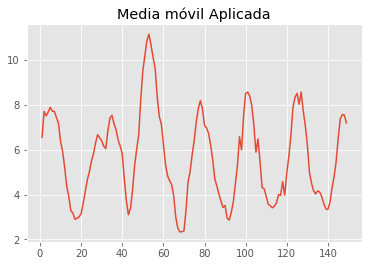

<Figure size 2560x1920 with 0 Axes>

In [20]:
from matplotlib import pyplot

pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150])
pyplot.title('Datos Entradas')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

dataset=dataset.rolling(window=8, min_periods=1).mean()

pyplot.plot(dataset[1:150])
pyplot.title('Media móvil Aplicada')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

Definimos el tamaño de imagen que se utilizara (en pixeles). Y se preparan datos para su conversión

In [21]:
import Tools as tls
import numpy as np

IMAGE_SIZE=94
X_train, y_train, X_test, y_test = tls.SerieToImage(dataset, IMAGE_SIZE)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],X_test.shape[2], 1))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2748, 94, 94, 1) (1306, 94, 94, 1) (2748, 1) (1306, 1)


Se envian matrices de datos de series de tiempo para generar las imagenes en formato jepg. Se guardan en el directiorio definido.

In [22]:
from matplotlib import pyplot
from matplotlib import image

tls.imageDataToJPG(X_train, y_train, 'images/train')
tls.imageDataToJPG(X_test, y_test, 'images/test')


Se muestra ejemplo imagen

Ejemplo serie de tiempo como imagen


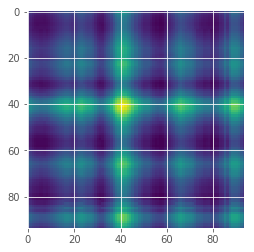

In [23]:
print('Ejemplo serie de tiempo como imagen')
img = image.imread('images/train/13.jpeg')
pyplot.imshow(img)
pyplot.show()

Se construye modelo y se compila

In [24]:
from keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

filt = 8
kernel = 3
dropout = 0.05
in_shape = (IMAGE_SIZE,IMAGE_SIZE,1)

model = Sequential((
            Convolution2D(filters=filt,kernel_size=kernel, activation='relu',input_shape=in_shape),
            MaxPooling2D(pool_size=(3, 3)),
            Dropout(dropout),
            Convolution2D(filters=filt,kernel_size=kernel, activation='relu'),
            Convolution2D(filters=filt,kernel_size=kernel, activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Convolution2D(filters=filt,kernel_size=kernel, activation='relu'),
            Convolution2D(filters=filt,kernel_size=kernel, activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(dropout),
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.25),
            Dense(1,activation='linear'),
            ))     
model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])

Se entrena modelo y se guarda historia.

In [ ]:
epochs = 500
history = model.fit(X_train, y_train, epochs=epochs, batch_size=24, validation_data=(X_test, y_test), verbose = 1)

Train on 2748 samples, validate on 1306 samples
Epoch 1/500
2748/2748 [==============================] - 5s 2ms/step - loss: 1.1378 - mean_absolute_error: 0.4940 - mean_squared_error: 1.1378 - val_loss: 0.0587 - val_mean_absolute_error: 0.1965 - val_mean_squared_error: 0.0587
Epoch 2/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0465 - mean_absolute_error: 0.1687 - mean_squared_error: 0.0465 - val_loss: 0.0365 - val_mean_absolute_error: 0.1366 - val_mean_squared_error: 0.0365
Epoch 3/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0313 - mean_absolute_error: 0.1366 - mean_squared_error: 0.0313 - val_loss: 0.0372 - val_mean_absolute_error: 0.1384 - val_mean_squared_error: 0.0372
Epoch 4/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0239 - mean_absolute_error: 0.1180 - mean_squared_error: 0.0239 - val_loss: 0.0325 - val_mean_absolute_error: 0.1238 - val_mean_squared_error: 0.0325
Epoch 5/500
2748/2748 [=============

2748/2748 [==============================] - 4s 1ms/step - loss: 0.0057 - mean_absolute_error: 0.0521 - mean_squared_error: 0.0057 - val_loss: 0.0147 - val_mean_absolute_error: 0.0759 - val_mean_squared_error: 0.0147
Epoch 37/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0058 - mean_absolute_error: 0.0522 - mean_squared_error: 0.0058 - val_loss: 0.0135 - val_mean_absolute_error: 0.0725 - val_mean_squared_error: 0.0135
Epoch 38/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0510 - mean_squared_error: 0.0055 - val_loss: 0.0122 - val_mean_absolute_error: 0.0694 - val_mean_squared_error: 0.0122
Epoch 39/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0054 - mean_absolute_error: 0.0509 - mean_squared_error: 0.0054 - val_loss: 0.0117 - val_mean_absolute_error: 0.0682 - val_mean_squared_error: 0.0117
Epoch 40/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0054 - mean_a

Epoch 72/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0038 - mean_absolute_error: 0.0430 - mean_squared_error: 0.0038 - val_loss: 0.0127 - val_mean_absolute_error: 0.0705 - val_mean_squared_error: 0.0127
Epoch 73/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0040 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0040 - val_loss: 0.0128 - val_mean_absolute_error: 0.0719 - val_mean_squared_error: 0.0128
Epoch 74/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0037 - mean_absolute_error: 0.0427 - mean_squared_error: 0.0037 - val_loss: 0.0124 - val_mean_absolute_error: 0.0717 - val_mean_squared_error: 0.0124
Epoch 75/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0037 - mean_absolute_error: 0.0432 - mean_squared_error: 0.0037 - val_loss: 0.0128 - val_mean_absolute_error: 0.0714 - val_mean_squared_error: 0.0128
Epoch 76/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.

2748/2748 [==============================] - 4s 1ms/step - loss: 0.0025 - mean_absolute_error: 0.0361 - mean_squared_error: 0.0025 - val_loss: 0.0122 - val_mean_absolute_error: 0.0685 - val_mean_squared_error: 0.0122
Epoch 108/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0369 - mean_squared_error: 0.0026 - val_loss: 0.0116 - val_mean_absolute_error: 0.0679 - val_mean_squared_error: 0.0116
Epoch 109/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0364 - mean_squared_error: 0.0027 - val_loss: 0.0124 - val_mean_absolute_error: 0.0708 - val_mean_squared_error: 0.0124
Epoch 110/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0024 - mean_absolute_error: 0.0355 - mean_squared_error: 0.0024 - val_loss: 0.0149 - val_mean_absolute_error: 0.0764 - val_mean_squared_error: 0.0149
Epoch 111/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0021 - me

2748/2748 [==============================] - 4s 1ms/step - loss: 0.0016 - mean_absolute_error: 0.0291 - mean_squared_error: 0.0016 - val_loss: 0.0132 - val_mean_absolute_error: 0.0722 - val_mean_squared_error: 0.0132
Epoch 143/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0018 - mean_absolute_error: 0.0306 - mean_squared_error: 0.0018 - val_loss: 0.0113 - val_mean_absolute_error: 0.0691 - val_mean_squared_error: 0.0113
Epoch 144/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0017 - mean_absolute_error: 0.0301 - mean_squared_error: 0.0017 - val_loss: 0.0147 - val_mean_absolute_error: 0.0774 - val_mean_squared_error: 0.0147
Epoch 145/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0018 - mean_absolute_error: 0.0300 - mean_squared_error: 0.0018 - val_loss: 0.0141 - val_mean_absolute_error: 0.0740 - val_mean_squared_error: 0.0141
Epoch 146/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0015 - me

2748/2748 [==============================] - 4s 1ms/step - loss: 0.0017 - mean_absolute_error: 0.0294 - mean_squared_error: 0.0017 - val_loss: 0.0156 - val_mean_absolute_error: 0.0782 - val_mean_squared_error: 0.0156
Epoch 178/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0012 - mean_absolute_error: 0.0253 - mean_squared_error: 0.0012 - val_loss: 0.0127 - val_mean_absolute_error: 0.0706 - val_mean_squared_error: 0.0127
Epoch 179/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0012 - mean_absolute_error: 0.0251 - mean_squared_error: 0.0012 - val_loss: 0.0139 - val_mean_absolute_error: 0.0745 - val_mean_squared_error: 0.0139
Epoch 180/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0013 - mean_absolute_error: 0.0257 - mean_squared_error: 0.0013 - val_loss: 0.0116 - val_mean_absolute_error: 0.0676 - val_mean_squared_error: 0.0116
Epoch 181/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0012 - me

2748/2748 [==============================] - 4s 1ms/step - loss: 9.5516e-04 - mean_absolute_error: 0.0224 - mean_squared_error: 9.5516e-04 - val_loss: 0.0145 - val_mean_absolute_error: 0.0769 - val_mean_squared_error: 0.0145
Epoch 213/500
2748/2748 [==============================] - 4s 1ms/step - loss: 9.5472e-04 - mean_absolute_error: 0.0225 - mean_squared_error: 9.5472e-04 - val_loss: 0.0122 - val_mean_absolute_error: 0.0690 - val_mean_squared_error: 0.0122
Epoch 214/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0011 - mean_absolute_error: 0.0233 - mean_squared_error: 0.0011 - val_loss: 0.0139 - val_mean_absolute_error: 0.0761 - val_mean_squared_error: 0.0139
Epoch 215/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0237 - mean_squared_error: 0.0010 - val_loss: 0.0113 - val_mean_absolute_error: 0.0675 - val_mean_squared_error: 0.0113
Epoch 216/500
2748/2748 [==============================] - 4s 1ms/step - l

2748/2748 [==============================] - 4s 1ms/step - loss: 9.4538e-04 - mean_absolute_error: 0.0221 - mean_squared_error: 9.4538e-04 - val_loss: 0.0126 - val_mean_absolute_error: 0.0713 - val_mean_squared_error: 0.0126
Epoch 247/500
2748/2748 [==============================] - 4s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0228 - mean_squared_error: 0.0010 - val_loss: 0.0123 - val_mean_absolute_error: 0.0708 - val_mean_squared_error: 0.0123
Epoch 248/500
2748/2748 [==============================] - 4s 1ms/step - loss: 9.2104e-04 - mean_absolute_error: 0.0221 - mean_squared_error: 9.2104e-04 - val_loss: 0.0126 - val_mean_absolute_error: 0.0707 - val_mean_squared_error: 0.0126
Epoch 249/500
2748/2748 [==============================] - 4s 1ms/step - loss: 7.9405e-04 - mean_absolute_error: 0.0206 - mean_squared_error: 7.9405e-04 - val_loss: 0.0131 - val_mean_absolute_error: 0.0723 - val_mean_squared_error: 0.0131
Epoch 250/500
2748/2748 [==============================] - 4s 1ms/

2748/2748 [==============================] - 4s 1ms/step - loss: 7.6512e-04 - mean_absolute_error: 0.0199 - mean_squared_error: 7.6512e-04 - val_loss: 0.0137 - val_mean_absolute_error: 0.0745 - val_mean_squared_error: 0.0137
Epoch 281/500
2748/2748 [==============================] - 4s 1ms/step - loss: 8.2129e-04 - mean_absolute_error: 0.0206 - mean_squared_error: 8.2129e-04 - val_loss: 0.0144 - val_mean_absolute_error: 0.0760 - val_mean_squared_error: 0.0144
Epoch 282/500
2748/2748 [==============================] - 4s 1ms/step - loss: 8.0531e-04 - mean_absolute_error: 0.0206 - mean_squared_error: 8.0531e-04 - val_loss: 0.0143 - val_mean_absolute_error: 0.0751 - val_mean_squared_error: 0.0143
Epoch 283/500
2748/2748 [==============================] - 4s 1ms/step - loss: 7.2835e-04 - mean_absolute_error: 0.0198 - mean_squared_error: 7.2835e-04 - val_loss: 0.0135 - val_mean_absolute_error: 0.0734 - val_mean_squared_error: 0.0135
Epoch 284/500
2748/2748 [==============================] -

Se grafican MSE y MAE

In [ ]:
pyplot.style.use("ggplot")
pyplot.figure()
N = epochs
pyplot.plot(np.arange(0, N), history.history["mean_squared_error"], label="mse")
pyplot.plot(np.arange(0, N), history.history["val_mean_squared_error"], label="val_mse")
pyplot.title("Training MSE")
pyplot.xlabel("Epoch #")
pyplot.ylabel("MSE")
pyplot.legend(loc="upper right")
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()
pyplot.plot(np.arange(0, N), history.history["mean_absolute_error"], label="mae")
pyplot.plot(np.arange(0, N), history.history["val_mean_absolute_error"], label="val_mae")
pyplot.title("Training MAE")
pyplot.xlabel("Epoch #")
pyplot.ylabel("MAE")
pyplot.legend(loc="upper right")
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

Se realizan predicciones con datos de prueba y se grafican

In [ ]:
#Se realizan predicciones con datos de prueba
predictions = model.predict(X_test, 24, verbose=2)
    
#Se grafican predicciones
pyplot.plot(y_test[1:100,], label='Real')
pyplot.plot(predictions[1:100,], label='Predicción')
pyplot.title('Valor predicción contra real')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()